# Business Understanding

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [6]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [8]:
# Shape of training data
# Rows = 391109
# Columns = 12
train.shape

(381109, 12)

In [9]:
# Checking number of NA values
# There are no NA values present in the dataset
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
# There are no duplicates in the data
def remove_duplicates(data):
    print("Number of rows before duplicate dropping: ", data.shape[0])
    data.drop_duplicates(inplace=True)
    print("Number of rows after dropping duplicates: ", data.shape[0])
    return data
remove_duplicates(train)

Number of rows before duplicate dropping:  381109
Number of rows after dropping duplicates:  381109


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [12]:
# Number of unique values
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.8+ MB


In [14]:
train['Region_Code'] = train['Region_Code'].astype('int64')
test['Region_Code'] = test['Region_Code'].astype('int64')

train['Policy_Sales_Channel'] = train['Policy_Sales_Channel'].astype('int64')
test['Policy_Sales_Channel'] = test['Policy_Sales_Channel'].astype('int64')

In [15]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

# Data Understanding and EDA

- Variable 	Definition
- id 	Unique ID for the customer
- Gender 	Gender of the customer
- Age: Age of the customer
- Driving_License 	0 : Customer does not have DL, 1 : Customer already has DL
- Region_Code 	Unique code for the region of the customer
- Previously_Insured 	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- Vehicle_Age 	Age of the Vehicle 
- Vehicle_Damage 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium 	The amount customer needs to pay as premium in the year
- Policy_Sales_Channel 	Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage 	Number of Days, Customer has been associated with the company
- Response 	1 :  Customer is interested, 0 : Customer is not interested

# Univariate Analysis

## Summary

### Response

- 87.74 percent of the customers in data are interested in the insurance, hence there is a huge imbalance between the number of non-interested clients.
- The company should find a way to identify the correct number clients, that are not interested and send better offers to them for subscription and monitor their behaviour

### Gender

- 54% of the customers are males, while around 46 percent are females
- Almost equal number of both genders with only certain imbalance, that is manageable
- Bivariate analysis recommended to find out which gender buy more vehicle insurance

### Driving License

- Almost the entire customer base has a driving license which is obvious
- People who do not have a license should be removed

### Previously Insured

- 54% of the customers are previous clients
- only 45 percent are not insured

### Vehicle Type

- Most of the vehicles are more than 2 years old with about 53%
- Only a few vehicles are in the range of 1 year life 
- 43% of the vehicles are within 1-2 years range

### Vehicle Damage

- Almost equal number of vehicles are damaged and non-damaged

### Age

- It is one-tailed distributed and is right-skewed.
- Most of the data has 20-30 years and falling after age of 45
- Min = 20 and Max = 85

### Annual Premium

- High number of Outliers
- Right Skewed

### Vintage

- It has a uniform distribution

### Policy Sales Channel

- No outliers much
- A few policies are more used than others

### Region Code

- Region 28 has maximum number of interested customers
- Regions 8, 50, 41 and 46 closely follow


In [36]:
def univariate_analysis(data, feature):
    plt.figure(figsize=(15,15))
    plt.subplot(1, 2, 1)
    print("Number of ", feature)
    print(data[feature].value_counts())
    sns.countplot(x=feature, data=data)
    plt.title(feature+" Distribution")
    plt.xlabel(feature+" Type")
    plt.ylabel(feature+" Count")
    
    plt.subplot(1,2,2)
    labels = data[feature].unique()
    size = data[feature].value_counts()
    if len(labels)==2:
        
        colors = ['blue', 'whitesmoke']
        explode = [0, 0.1]
    if len(labels)==3:
        colors = ['blue', 'whitesmoke', 'yellow']
        explode = [0, 0.1, 0.2]
    plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
    plt.title(feature+' Type')
    plt.axis('off')
    plt.legend(loc='upper left', bbox_to_anchor = (1,1))
    plt.show()

Number of  Response
0    334399
1     46710
Name: Response, dtype: int64


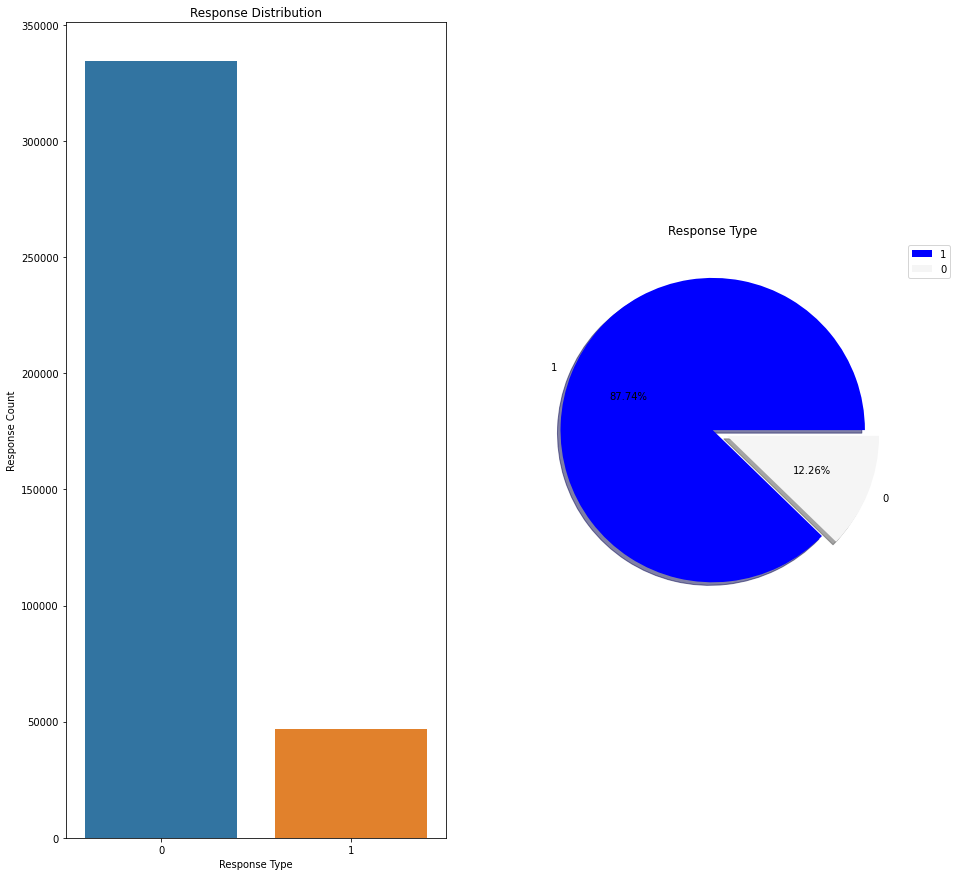

In [37]:
univariate_analysis(train, 'Response')

Number of  Gender
Male      206089
Female    175020
Name: Gender, dtype: int64


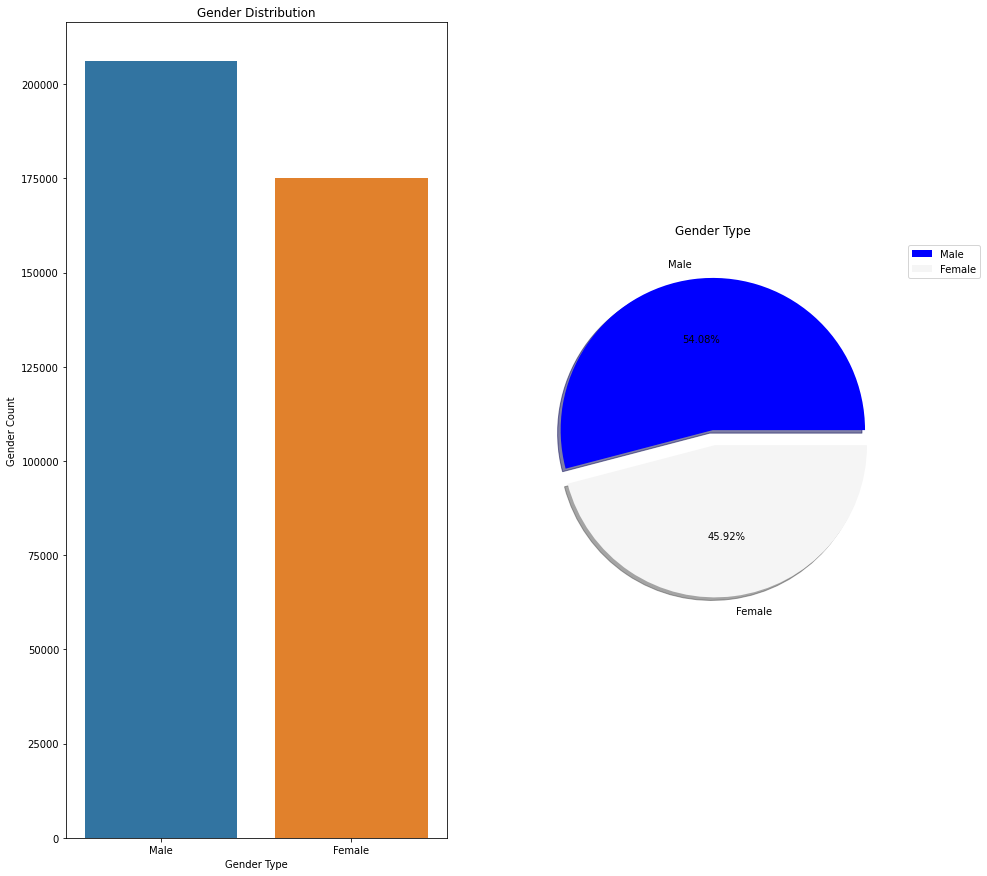

In [21]:
univariate_analysis(train, 'Gender')

Number of  Driving_License
1    380297
0       812
Name: Driving_License, dtype: int64


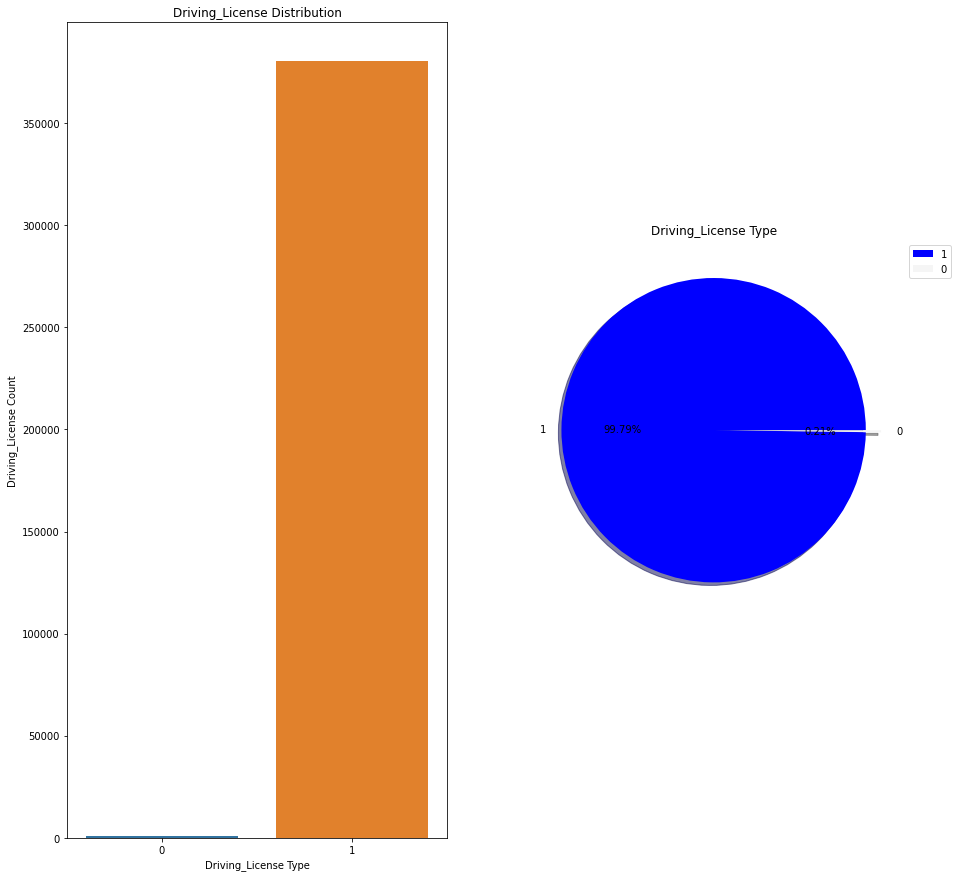

In [22]:
univariate_analysis(train, 'Driving_License')

Number of  Previously_Insured
0    206481
1    174628
Name: Previously_Insured, dtype: int64


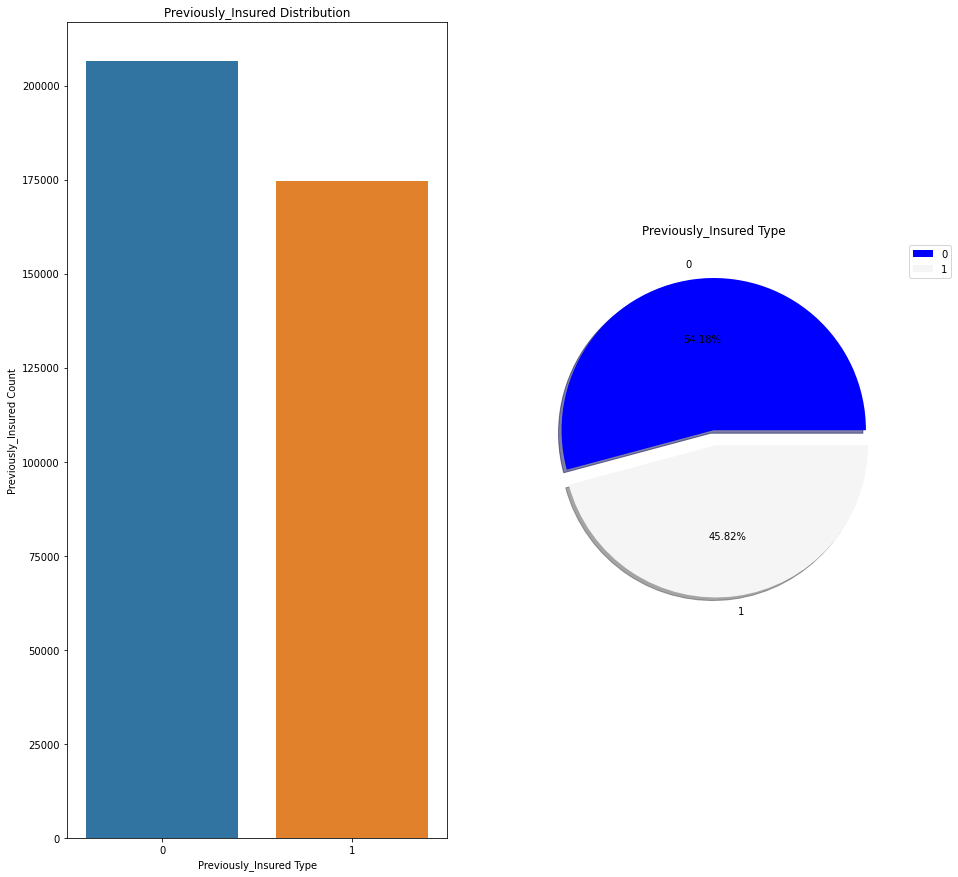

In [23]:
univariate_analysis(train, 'Previously_Insured')

Number of  Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


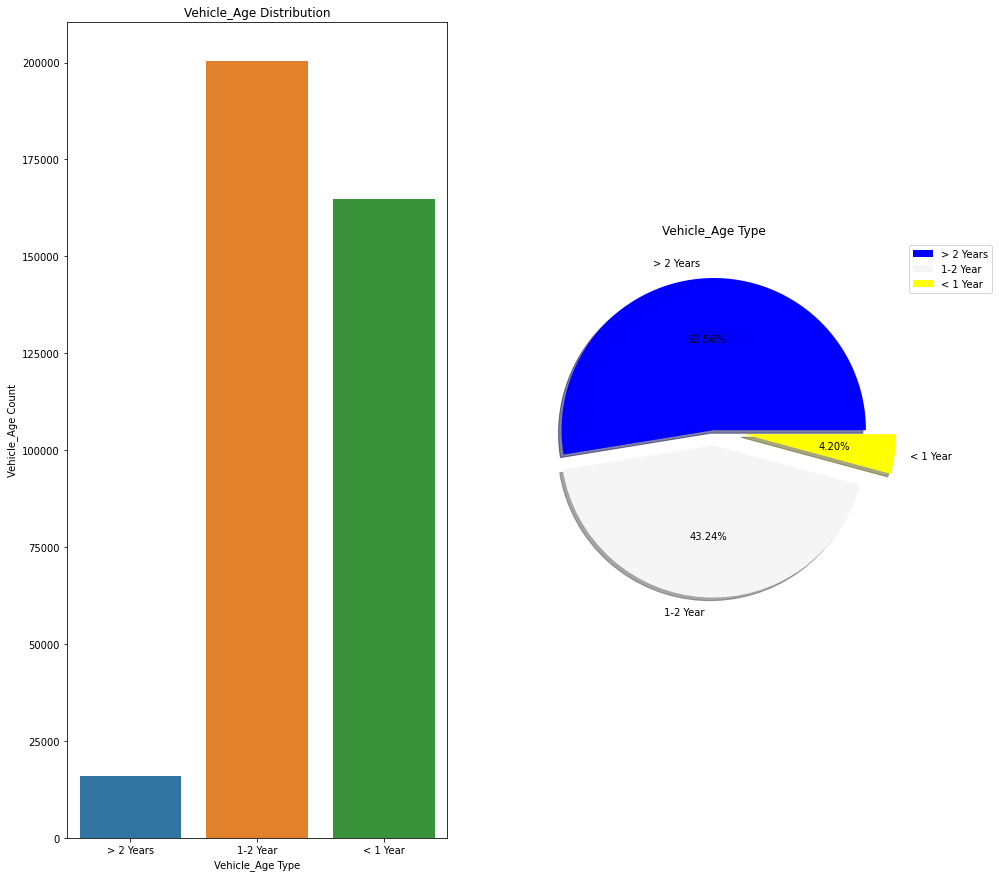

In [39]:
univariate_analysis(train, 'Vehicle_Age')

Number of  Vehicle_Damage
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


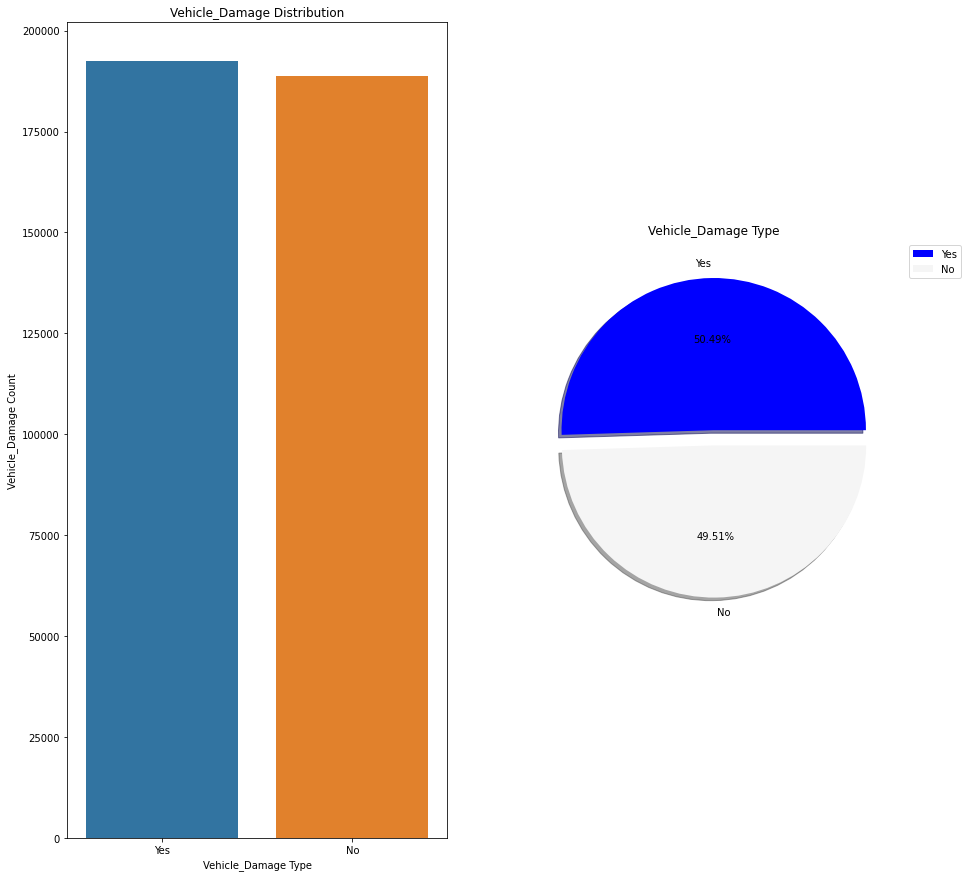

In [40]:
univariate_analysis(train, 'Vehicle_Damage')

In [45]:
def distribution(data, feature):
    plt.figure(figsize=(15,15))
    sns.countplot(data[feature], palette = 'hsv')
    plt.title('Distribution of '+feature)
    plt.show()

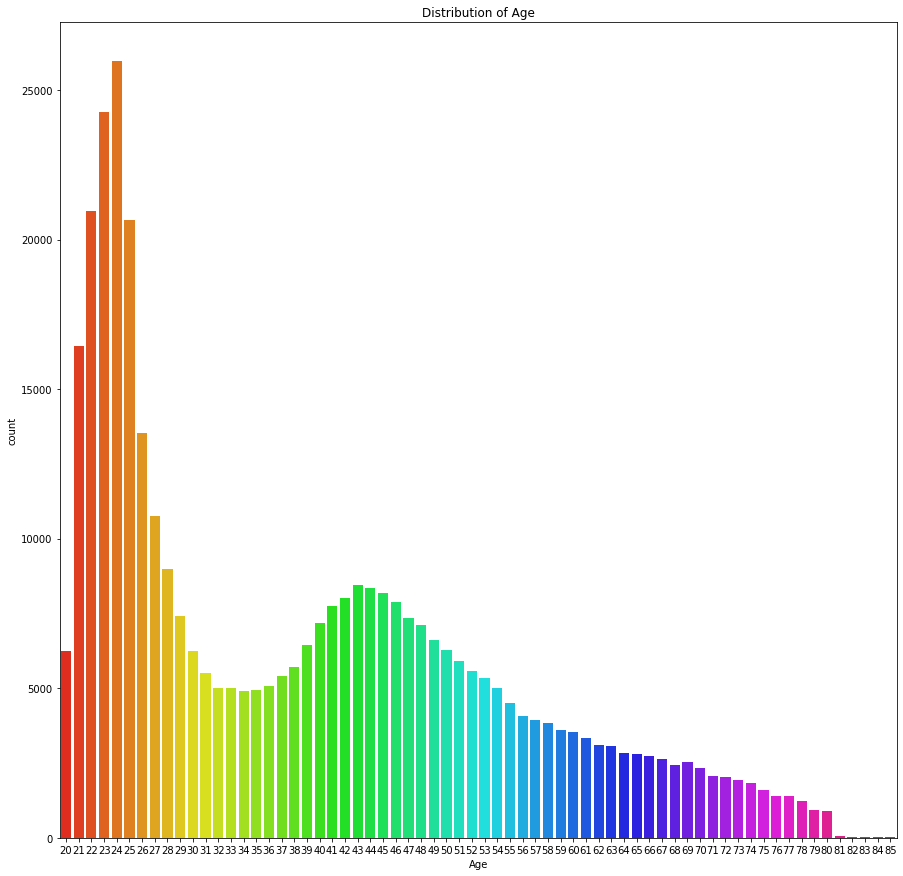

In [46]:
distribution(train, 'Age')

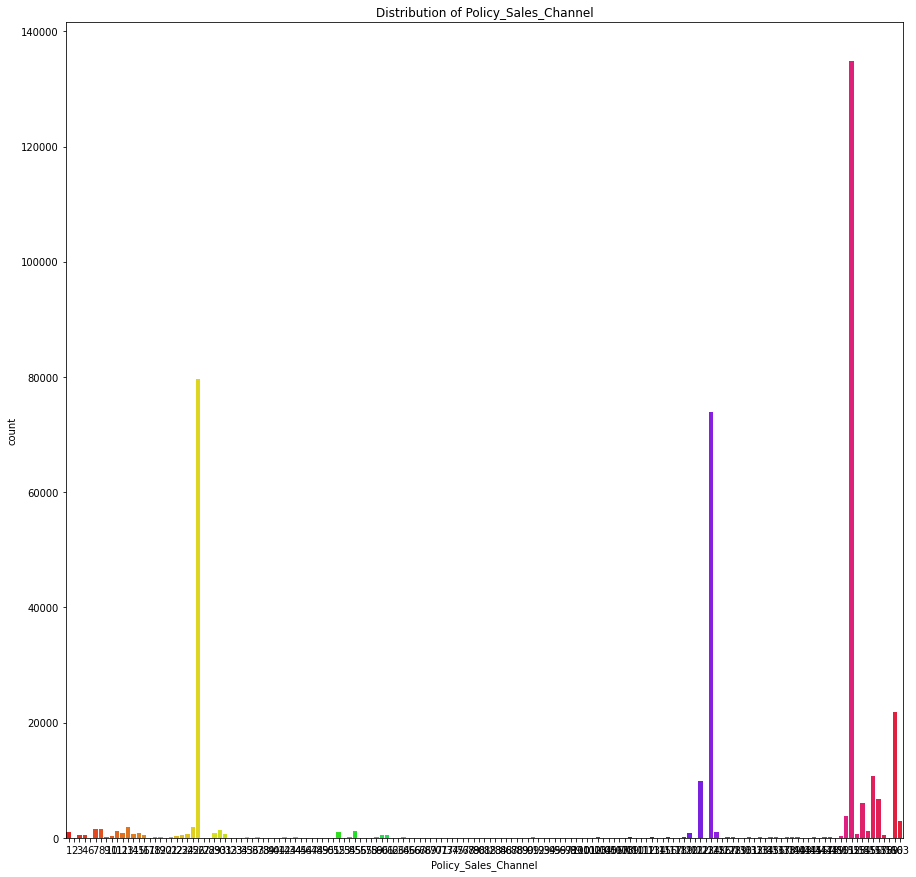

In [57]:
distribution(train, 'Policy_Sales_Channel')

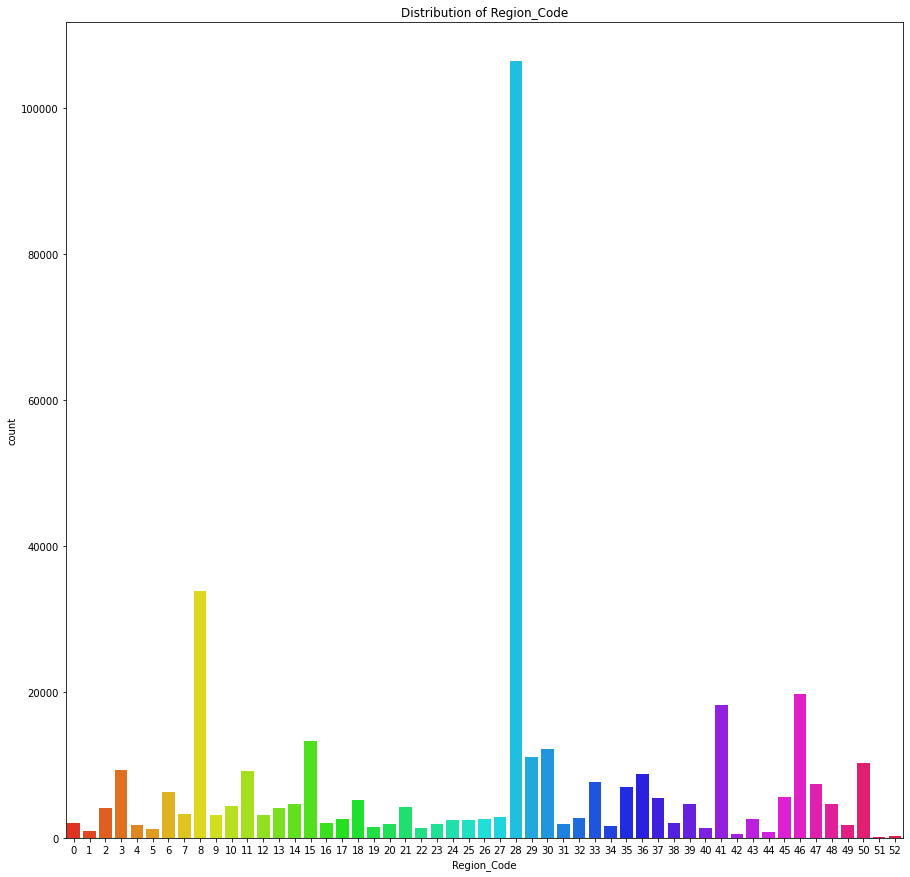

In [48]:
distribution(train, 'Region_Code')

In [52]:
def data_distribution(data, feature):
    
    plt.figure(figsize = (20,5))

    plt.subplot(1,3,1)
    sns.kdeplot(data[feature], shade=True)

    plt.subplot(1,3,2)
    sns.distplot(data[feature])

    plt.subplot(1,3,3)
    sns.boxplot(data[feature], orient = 'vertical')

    print("Skewness : {}, Kurtosis : {}".format(data[feature].skew(), data[feature].kurtosis()))
    plt.show()

Skewness : 0.6725389977260843, Kurtosis : -0.5656550664686129


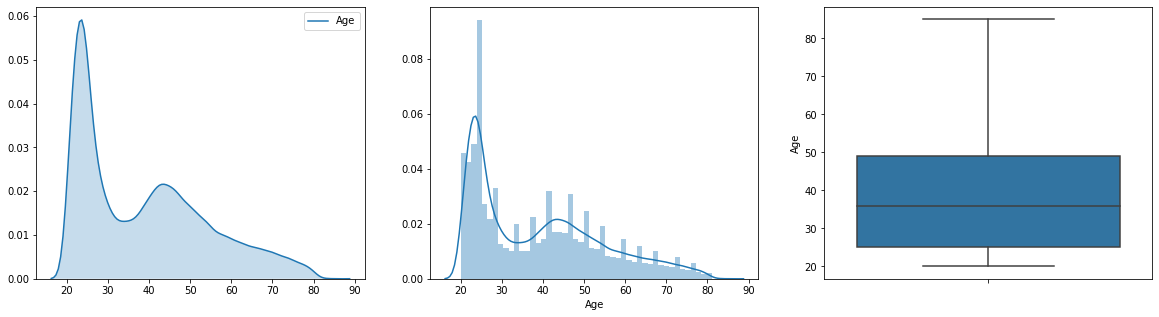

In [53]:
data_distribution(train, 'Age')

Skewness : 1.7660872148961309, Kurtosis : 34.004568696114696


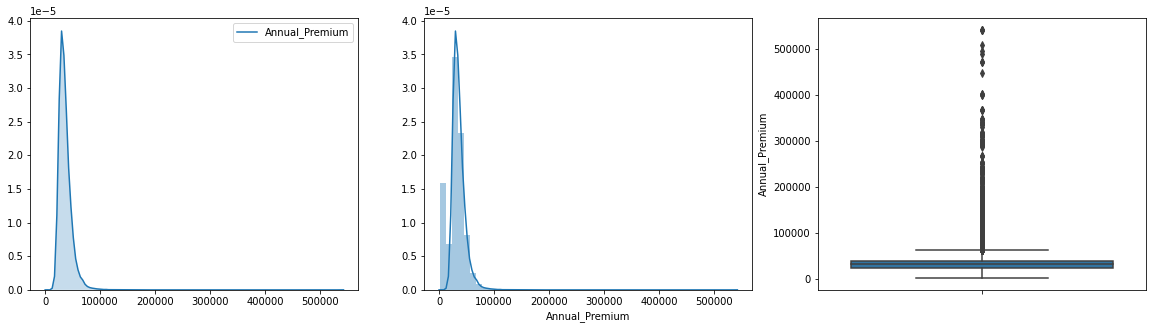

In [54]:
data_distribution(train, 'Annual_Premium')

Skewness : 0.0030295168899980816, Kurtosis : -1.2006880422961197


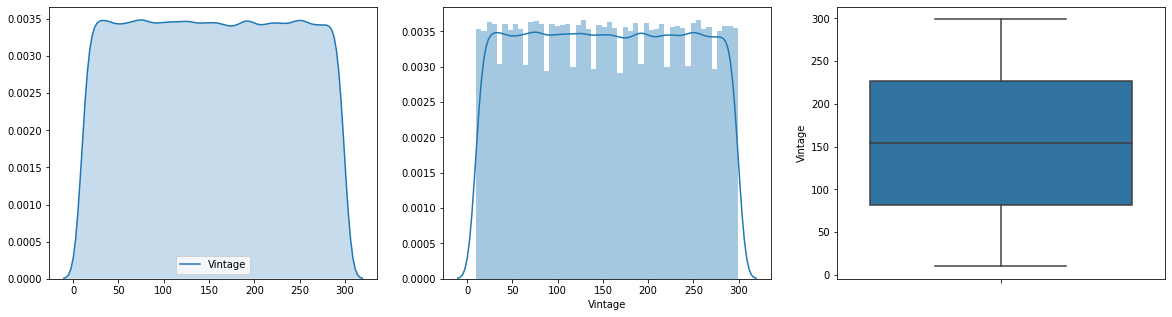

In [56]:
data_distribution(train, 'Vintage')

Skewness : -0.9000081235103394, Kurtosis : -0.9708101781380822


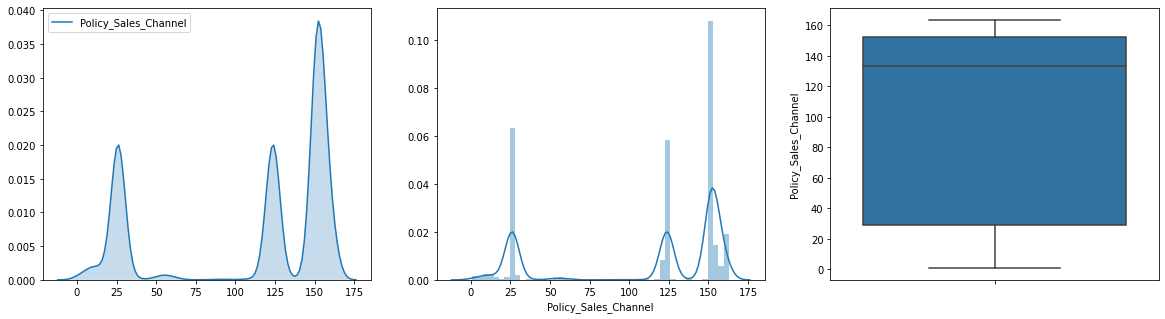

In [59]:
data_distribution(train, 'Policy_Sales_Channel')

Skewness : -0.11526641488610123, Kurtosis : -0.8678571198093348


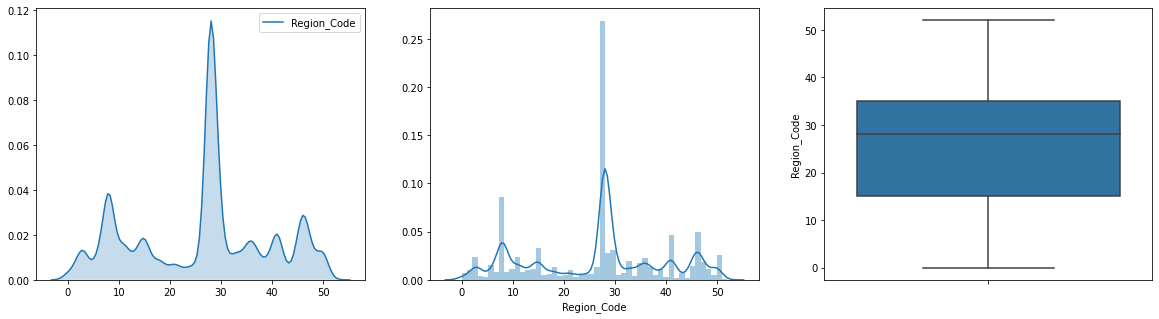

In [60]:
data_distribution(train, 'Region_Code')

# Bivariate Analysis

### Gender

- Males are little more interested than Females to buy vehicle insurance, however they are also in a slightly larger number in the entire data as a whole, so we cannot directly infer the causation of interest to be Gender.

### Driving License

- There is ofcourse nobody interested in vehicle insurance who does not have a driving license as expected.

### Previously Insured

- The people who are not insured are interested to buy, and there are nobody who want to buy it again.

### Vehicle Age

- The vehicles aged between 1-2 years are most interested customers

### Vehicle Damage

- The vehicles which are damaged are the most interested 


In [65]:
def bi_count(data, feature1, feature2='Response'):
    sns.countplot(data=data, x=feature1, hue=feature2)
    plt.show()

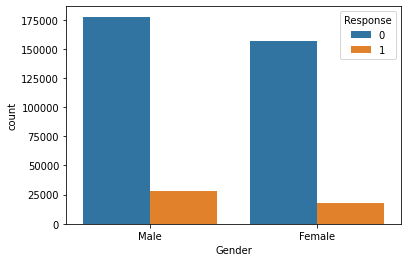

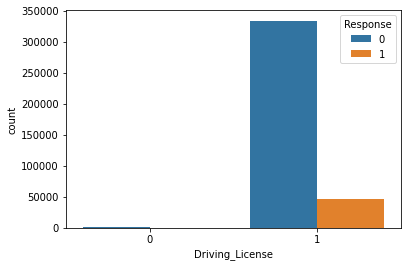

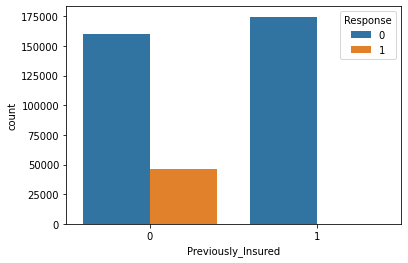

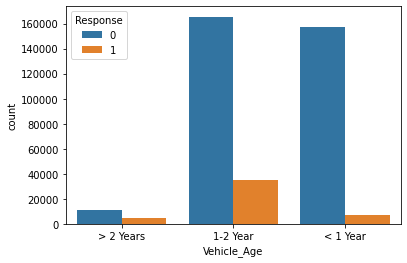

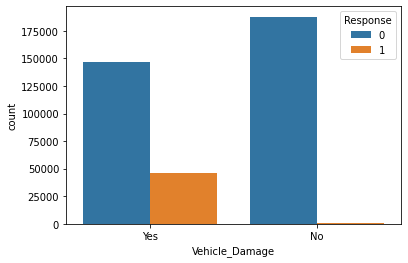

In [67]:
cat_columns = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
for i in cat_columns:
    bi_count(train, i)

# Multiple Variable Analysis

- Non-Previously Insured Vehicles above the age of 2 years are all definitely interested, and hence becomes the target section of the entire scheme.
- There is hardly anyone who is previously insured and greater than 2 years of age for vehicle who want to buy insurance again even if the vehicle is damaged.
- If the vehicle is not previously insured, lies in any age range and is damaged then it is highly likely to be interested for insurance.
- The same trend is observed in both genders irrespective.

In [72]:
pd.crosstab(index = [train['Previously_Insured'], train['Vehicle_Age'], train['Vehicle_Damage']], columns = train['Response'])

Response                                            0      1
Previously_Insured Vehicle_Age Vehicle_Damage               
0                  1-2 Year    No               12106    557
                               Yes              88174  34154
                   < 1 Year    No               10966    353
                               Yes              37423   6787
                   > 2 Years   No                   8      0
                               Yes              11252   4701
1                  1-2 Year    No               59389     39
                               Yes               5841     56
                   < 1 Year    No              105238     33
                               Yes               3957     29
                   > 2 Years   No                   7      0
                               Yes                 38      1

In [83]:
pd.crosstab(index = [train['Gender'], train['Vehicle_Age'], train['Vehicle_Damage']], columns=train['Response'])

Response                               0      1
Gender Vehicle_Age Vehicle_Damage              
Female 1-2 Year    No              29077    223
                   Yes             35532  13160
       < 1 Year    No              65852    195
                   Yes             22190   3084
       > 2 Years   No                  8      0
                   Yes              4176   1523
Male   1-2 Year    No              42418    373
                   Yes             58483  21050
       < 1 Year    No              50352    191
                   Yes             19190   3732
       > 2 Years   No                  7      0
                   Yes              7114   3179